Thyroid Dataset Information in this [link](https://www.researchgate.net/publication/325117645_A_Comparative_study_of_machine_learning_algorithms_on_thyroid_disease_prediction).

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler



### Mount google colab to drive to access to the dataset (uncomment only when you use Google Colab + Drive)
# from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# Load dataset (specify full path like '/content/drive/My Drive/...' when you use Google Colab + Drive)
train_data = pd.read_csv('/content/drive/MyDrive/comp4702/ann-train.data', delim_whitespace=True, header=None)
test_data = pd.read_csv('/content/drive/MyDrive/comp4702/ann-test.data', delim_whitespace=True, header=None)

#TODO: Split into X and y
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

<ipython-input-3-0c4cd7380e7f>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_data = pd.read_csv('/content/drive/MyDrive/comp4702/ann-train.data', delim_whitespace=True, header=None)
<ipython-input-3-0c4cd7380e7f>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_data = pd.read_csv('/content/drive/MyDrive/comp4702/ann-test.data', delim_whitespace=True, header=None)


# Q1

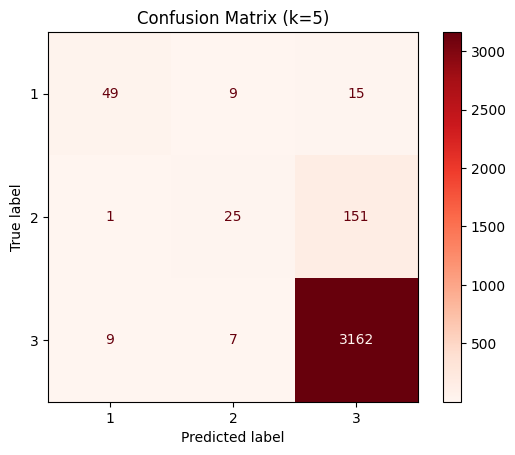

----------------------------
Accuracy: 94.4%


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# important for knn
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#TODO: Step 1: Train a k-NN model (choose some reasonable value for k)
k = 5  # Choose a value for k (e.g., 5)
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)

#TODO: Step 2: Make Predictions
y_pred = knn_model.predict(X_test_scaled)

#TODO: Step 3: Evaluate Model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Step 4: Visualize the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn_model.classes_)
disp.plot(cmap='Reds')
plt.title(f'Confusion Matrix (k={k})')
plt.show()

print('----------------------------')
print(f"Accuracy: {np.around(accuracy*100, 2)}%")

# Q2

## binary class labels according to textbook
- normal, hyperthyroid, hypothyroid
- normal = 0, hyper/hypo = 1 (abnormal)

(a)

In [10]:
#TODO: Convert dataset to perform binary classification
y_train = train_data.iloc[:, -1].apply(lambda label: 0 if label == 3 else 1)
y_test = test_data.iloc[:, -1].apply(lambda label: 0 if label == 3 else 1)

#TODO: Split X and y
X_train = train_data.iloc[:, :-1]
X_test = test_data.iloc[:, :-1]

# scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(b)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#TODO: Train logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

#TODO: Make predictions on the test set
y_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

#TODO: Calculate the confusion matrix
y_pred_default = (y_proba >= 0.5).astype(int)
conf_matrix_default = confusion_matrix(y_test, y_pred_default)
accuracy_default = accuracy_score(y_test, y_pred_default)

print("Confusion matrix with threshold = 0.5:")
print(conf_matrix_default)
print(f"Accuracy: {accuracy_default * 100:.2f}%")


Confusion matrix with threshold = 0.5:
[[3149   29]
 [ 121  129]]
Accuracy: 95.62%


(c)


In [13]:
threshold = 0.15  # Vary the threshold as you want

#TODO: Recalculate the confusion matrix
# HINT: You can use the probability functions and threshold to obtain the new predictions from the trained model

y_pred_thresh = (y_proba >= threshold).astype(int)
conf_matrix_thresh = confusion_matrix(y_test, y_pred_thresh)
accuracy_thresh = accuracy_score(y_test, y_pred_thresh)

print("\nConfusion matrix with threshold = 0.15:")
print(conf_matrix_thresh)
print(f"Accuracy: {accuracy_thresh * 100:.2f}%")



Confusion matrix with threshold = 0.15:
[[3076  102]
 [  37  213]]
Accuracy: 95.95%


# Q3

##### - assume same parameters as week 4, predict weight in kg

In [17]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/comp4702/pokemonregr.csv')

#TODO: Clean and Split dataset
df = df.dropna()
features = ['attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'height_m']
target = 'weight_kg'
X = df[features]
y = df[target]

# scaling first mean = 0, std = 1 to ensure fair comparison between features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Define a function to use regularization with linear regression model
def fit_linear(regularization=None, alpha=1.0):
  #TODO: Train a linear regression model according to the specified regularization type
  if regularization == 'L1':
    model = Lasso(alpha=alpha)
  elif regularization == 'L2':
    model = Ridge(alpha=alpha)
  else:
    model = LinearRegression()

  model.fit(X_scaled, y)
  return model




# Fit and obtain coefficients when using different regularization techniques with different regularization hyperparameter
reg = [None, 'L1', 'L2']

for r in reg:
  #TODO: train a model for each regularization type
  model = fit_linear(regularization=r, alpha=1.0)
  print(f"Coef when using {r} Regularization: {model.coef_}")
  print("------------------")

  # linear regr model has largest coeff since it doesn't penalise weight magnitude -- only trying to minimise pred error
  # ridge (L2) shrinks coeffs slightly but keeps all features - penalty for large weights
  # lasso (L1) forces some coeff to 0, and eliminates less important features (sp-attack in this case) - it uses absolute value penalty (total weight size) causing unimportant features to shrink to 0 (good for feature selection)

Coef when using None Regularization: [ 12.15337036  17.47803453   0.79121435   4.29529442 -12.17646811
  57.77623107]
------------------
Coef when using L1 Regularization: [ 10.96083996  17.77210089   0.           3.55174632 -10.12913939
  57.28388694]
------------------
Coef when using L2 Regularization: [ 12.16151552  17.47354938   0.80316097   4.30813019 -12.15404821
  57.68757906]
------------------
